# Numerov algroithm for the Schrödinger equation

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# define hermitian form of polynomial
def hermit_poly(n,x):
    if n==0:
        out = np.zeros(x.shape[0])
        out[:]=1
        return out
    elif n==1:
        return(2*x)
    else:
        return(2*x*hermit_poly(n-1,x)-2*(n-1)*hermit_poly(n-2,x))

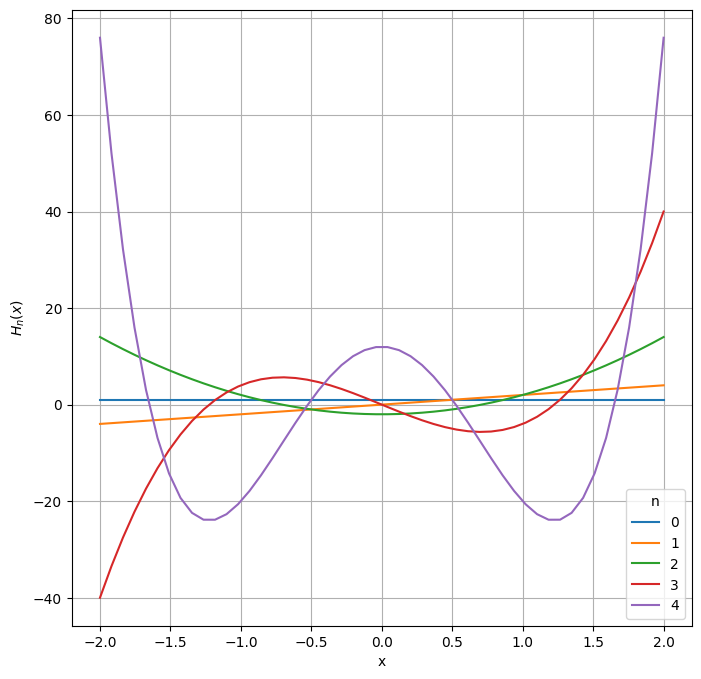

In [3]:
# plot first five hermitian polynomials
test_x = np.linspace(-2,2)
f, ax = plt.subplots(1,1, figsize=(8,8))
for n in range(5):
    ax.plot(test_x, hermit_poly(n,test_x),label=n)
    ax.set(xlabel='x',ylabel='$H_n(x)$')
ax.legend(title='n')
ax.grid()

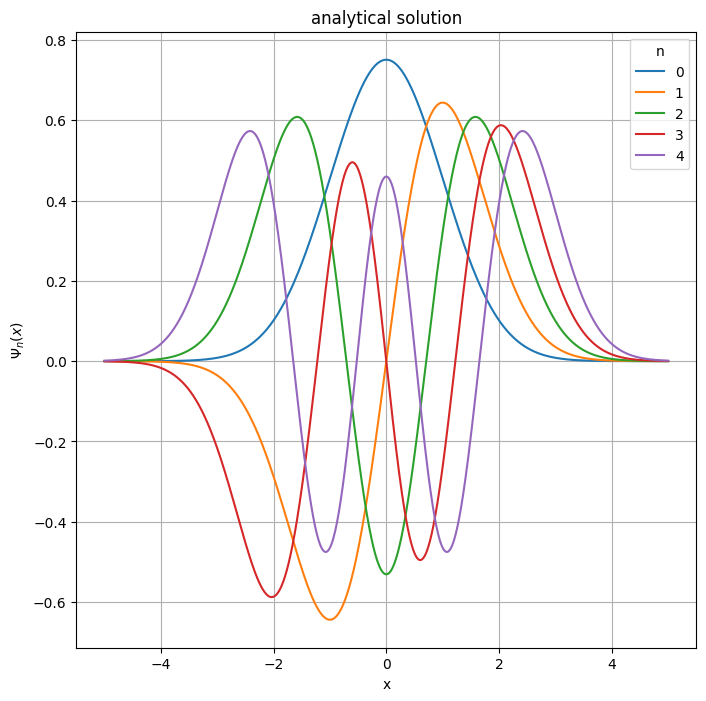

In [4]:
from scipy.special import factorial

# define function for analytical solution of psy
def Psy(n,x):
    norm = 2**n * factorial(n) * np.sqrt(np.pi)
    norm = np.sqrt(norm)
    return(hermit_poly(n,x)/norm * np.exp(-x**2/2))

# plot psy with the first five hermit polynomials
test_x = np.linspace(-5,5,1000)
f, ax = plt.subplots(1,1, figsize=(8,8))
for n in range(5):
    ax.plot(test_x, Psy(n, test_x), label=n)

ax.set(xlabel='x', ylabel='$\\Psi_n(x)$', title='analytical solution')
ax.legend(title='n')
ax.grid()

In [17]:
# k(x) in the muerov formalism for this problem
def k_harm0sci(x, epsilon):
    return(2*epsilon - x**2)

# numerov algorithm

def numerov(x0, y0, y1, k, n_step, h, k_args={}):
    output = np.zeros((n_step + 2, 2))
    output[0, 0] = x0
    output[0, 1] = y0
    output[1, 0] = x0 + h
    output[1, 1] = y1

    for i in np.arange(2, n_step + 2):
        output[i, 0] = output[i - 1, 0] + h
        y_i = (2. - 5. / 6. * k(output[i - 1, 0], **k_args) * h ** 2) * output[i - 1, 1]
        y_i = y_i - (1. + 1. / 12. * k(output[i - 2, 0], **k_args) * h ** 2) * output[i - 2, 1]
        y_i = y_i / (1. + 1. / 12. * k(output[i, 0], **k_args) * h ** 2)
        output[i, 1] = y_i

    return output



def numerov_harm0sci(n, x_max, h):
    # setup energy
    epsilon = n + 0.5   # energy eigenvalues

    # symmetric solutions if n is even
    if n % 2 == 0:
        a = Psy(n, np.array([0]))  #Psi(0)
        y0 = a 
        y1 = y0 - h * h * k_harm0sci(0,epsilon) * y0*0.5

    # Asymmetric if n is odd
    else:
        a = Psy(n,np.array([h]))    # Psy(h)
        y0 = 0.
        y1= a 
    
    # number of steps
    n_step = int(x_max/h) - 1

    return(numerov(x0=0., y0=y0, y1=y1, k=k_harm0sci, n_step=n_step, h = h, k_args={'epsilon' : epsilon}))

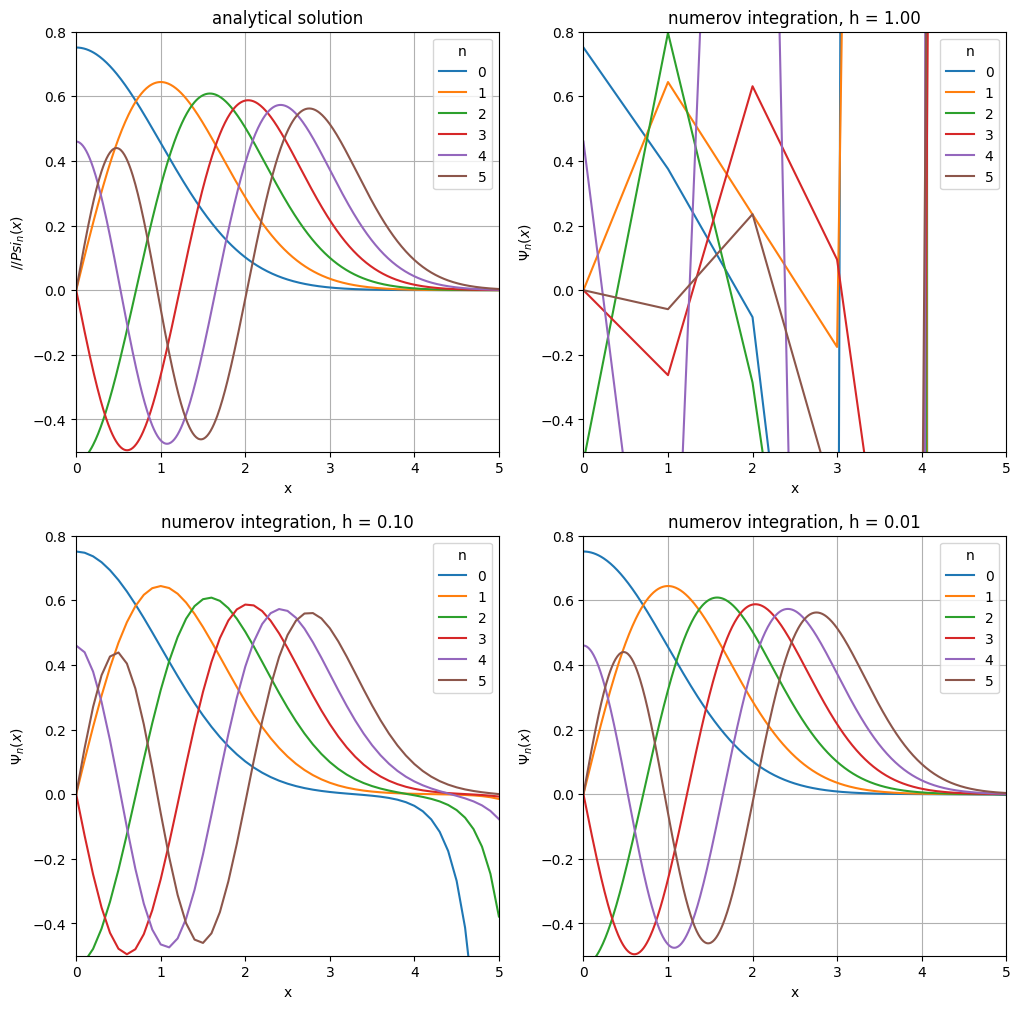

In [18]:
# apply numerov integration to schroedinger eq of harmonic oscillator
h = [1., 0.1, 0.01]
n_i = range(6)
x_max = 5.

# setup plot
f, ax = plt.subplots(2,2, figsize=(12,12))
x_as = np.arange(0,x_max + h[2], h[2])
for n in n_i:
    ax[0,0].plot(x_as, Psy(n,x_as), label=n)
    ax[0,0].legend(title = 'n')
ax[0,0].grid()
ax[0,0].set(xlabel='x',ylabel='$//Psi_n(x)$', title = 'analytical solution',
xlim=(0,5), ylim=(-0.5, 0.8))
plot_coords = [[0,1],[1,0],[1,1]]

for i in range(len(h)):
    h_i = h[i]
    p=plot_coords[i]
    for n in n_i:
        num= numerov_harm0sci(n=n, x_max=x_max,h=h_i)
        ax[p[0],p[1]].plot(num[:,0],num[:,1], label=n)
    ax[p[0],p[1]].legend(title='n')
    ax[p[0],p[1]].set(xlabel='x', ylabel='$\\Psi_n(x)$',
        title='numerov integration, h = %.2f' % h_i, xlim=(0,5),ylim=(-0.5,0.8))
    
ax[p[0],p[1]].grid()